# Laboratorio 3 Python

## Parte 1. Numpy

Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?


In [3]:
import numpy as np

# debido a que cada elemento booleano ocupa 1 byte, calcula el tamaño:
array = np.zeros(1000, dtype=bool)
print(array.nbytes)


1000


2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [15]:
pares = np.arange(2, 101, 2)
pares_inversos = np.flip(pares)
ultimos_10 = pares_inversos[-10:]
print(ultimos_10)


[20 18 16 14 12 10  8  6  4  2]


3.	Dado el array

2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1

Seleccione con una instrucción el subarray de elementos

0 3 7 4

Después, seleccione el subarray de elementos

2 5
8 5

In [30]:
array = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
subarray1 = array[1, 0:5]
print(subarray1)


subarray2 = array[0:3:2, 0:4:2]
print(subarray2)


[0 3 7 4]
[[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [33]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diferencia = a - b
media = np.mean(diferencia)
print(media)


-0.25


5. Dados los valores de cordenadas (x, y) en las columnas del array

1.33	4.5
30.0	10.7
70.2	0.5

Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [43]:
# Crear el array original
arr = np.array([[1.33, 4.5],[30.0, 10.7],[70.2, 0.5]])

# Agregar las nuevas coordenadas
new_coords = np.array([37.1, -3.6])
arr = np.append(arr, [new_coords], axis=0)

# Mostrar las dimensiones del nuevo array
print("Dimensiones del nuevo array:")
print(arr)

Dimensiones del nuevo array:
[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


6. Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [55]:
# Copiar el array anterior
arr_transp = arr.copy()
print('Array copiado del ejercicio anterior: ')
print (arr)

# Transpone el array
arr_transp = arr_transp.T
print('Array transpuesto: ')
print (arr_transp)

# Agregar las nuevas coordenadas al array transpuesto
new_coords = np.array([[10.8, 3.0], [35.8, 12.0]])
arr_transp = np.append(arr_transp, new_coords.T, axis=1)

# Mostrar el nuevo array transpuesto completo
print("Nuevo array transpuesto:")
print(arr_transp)

Array copiado del ejercicio anterior: 
[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]
 [10.8  35.8 ]
 [ 3.   12.  ]]
Array transpuesto: 
[[ 1.33 30.   70.2  37.1  10.8   3.  ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.  ]]
Nuevo array transpuesto:
[[ 1.33 30.   70.2  37.1  10.8   3.   10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6  35.8  12.    3.   12.  ]]


## Parte 2. Exploración y minería de datos

In [57]:
import pandas as pd

df = pd.read_csv('nucleospoblacion.csv')

1. ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [58]:
municipios_mas_100k = df[df['Poblacion'] > 100000]['Municipio'].count()
print("Municipios con más de 100000 habitantes:", municipios_mas_100k)

Municipios con más de 100000 habitantes: 62


2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayor y responda:

a.	¿Cuál es la segunda ciudad más poblada?
b.	¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

<AxesSubplot:xlabel='Municipio'>

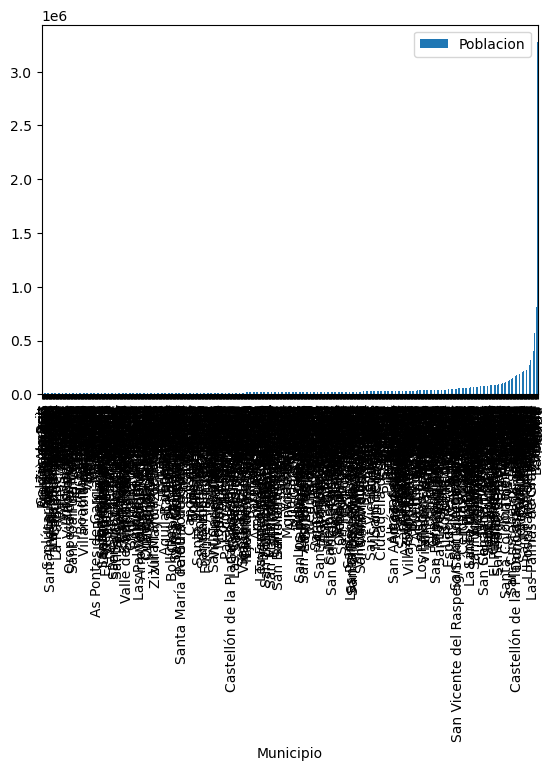

In [59]:
df_sorted = df.sort_values('Poblacion')
df_sorted.plot.bar(x='Municipio', y='Poblacion')

a.	¿Cuál es la segunda ciudad más poblada?

In [60]:
segunda_ciudad = df_sorted.iloc[-2]['Municipio']
print("La segunda ciudad más poblada es:", segunda_ciudad)


La segunda ciudad más poblada es: Barcelona


b.	¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

In [61]:
posicion_granada = df_sorted[df_sorted['Municipio'] == 'Granada'].index[0] + 1
print("Granada ocupa la posición número", posicion_granada, "en el ranking de ciudades más pobladas.")


Granada ocupa la posición número 273 en el ranking de ciudades más pobladas.


3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [65]:
municipios_ext_5000 = df[(df['Comunidad Autonoma'] == 'Extremadura') & (df['Poblacion'] > 5000)]['Municipio'].count()
print("Municipios de Extremadura con más de 5000 habitantes:", municipios_ext_5000)


KeyError: 'Comunidad Autonoma'

4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [66]:
municipio_norte = df.loc[df['Y'].idxmax()]
print("Municipio más al norte:", municipio_norte['Municipio'])
print("Provincia:", municipio_norte['Provincia'])
print("Población:", municipio_norte['Poblacion'])


Municipio más al norte: Viveiro
Provincia: Lugo
Población: 16211.0


5.	Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [75]:
poblacion_granada = df[df["Provincia"] == "Granada"]["Poblacion"]
media = poblacion_granada.mean()
mediana = poblacion_granada.median()
desv_std = poblacion_granada.std()
maximo = poblacion_granada.max()
minimo = poblacion_granada.min()
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desv_std)
print("Máximo:", maximo)
print("Mínimo:", minimo)


Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49171459277
Máximo: 239154.0
Mínimo: 10386.0


6.	Realice un histograma con la población de los Municipios para cada una de las provincias.

IndexError: index 3 is out of bounds for axis 0 with size 3

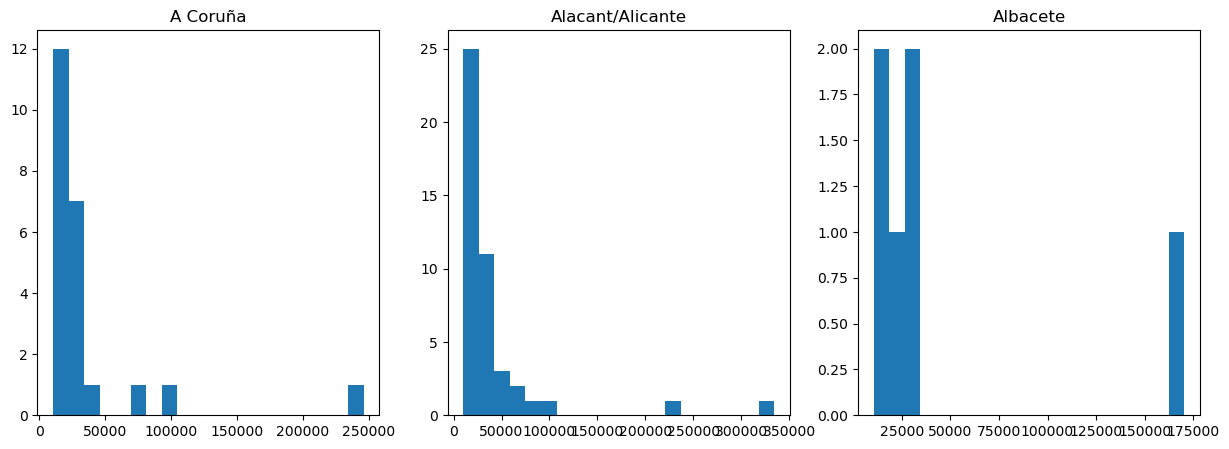

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, (Provincia, group) in enumerate(df.groupby('Provincia')):
    axs[i].hist(group['Poblacion'], bins=20)
    axs[i].set_title(Provincia)

plt.show()


7.	Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [82]:
import random

random.seed(42)
sample_df = df.sample(n=50, replace=False)

sample_mean = sample_df['Poblacion'].mean()
sample_std = sample_df['Poblacion'].std()

print("Promedio de población en la muestra: ", sample_mean)
print("Desviación estándar de la población en la muestra: ", sample_std)


Promedio de población en la muestra:  33923.78
Desviación estándar de la población en la muestra:  47465.999629074984


8.	Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [83]:
madrid_df = df[df['Provincia'] == 'Madrid']
madrid_df = madrid_df[madrid_df['Municipio'] != 'Madrid']

import math

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radio de la Tierra en km
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2)**2 + \
        math.cos(phi1) * math.cos(phi2) * \
        math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d
